**Customer Segmentation Analysis with Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/Mall_Customers (1).csv')

# Replace values in Genre column, male with 1 and female with 0
df['Genre'] = np.where(df['Genre'] == "Male", 1, 0)

# Remove the first column
df = df.drop(df.columns[0], axis=1)

# Change the dataset columns names
column_mapping = {'Annual Income (k$)': 'Income',
                  'Spending Score (1-100)': 'SpSc'}

# Rename the columns using the dictionary
df = df.rename(columns=column_mapping)

df.head()

,Genre,Age,Income,SpSc
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


**Explore the data**

In [2]:
#Describe the data
df.describe()

,Genre,Age,Income,SpSc
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


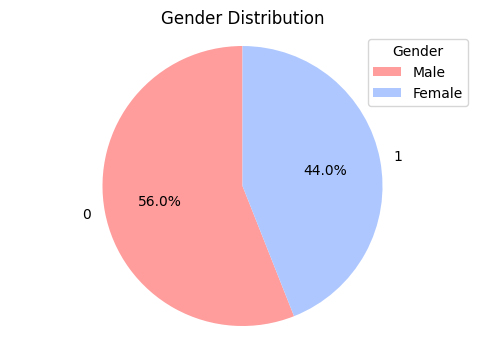

In [8]:
import matplotlib.pyplot as plt

# Count the number of males and females
gender_counts = df['Genre'].value_counts()

# Create a pastel color palette
colors = ['#FF9C9C', '#AEC8FF']  # Adjust the colors as desired

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')

# Add a legend
legend_labels = ['Male', 'Female']
plt.legend(title='Gender', labels=legend_labels, loc='upper right')

plt.show()

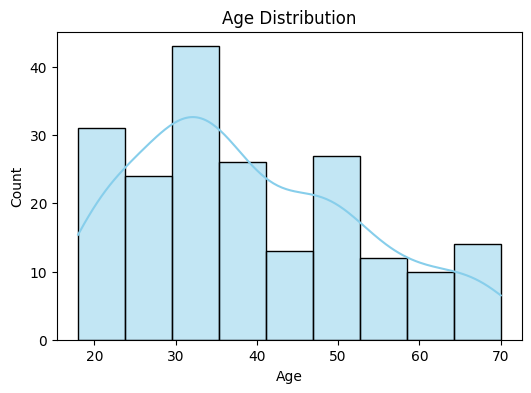

In [11]:
import seaborn as sns

plt.figure(figsize=(6, 4))

# Create the histogram with sns
sns.histplot(data=df, x='Age', kde=True, color='skyblue')

# Set the plot title and axis labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

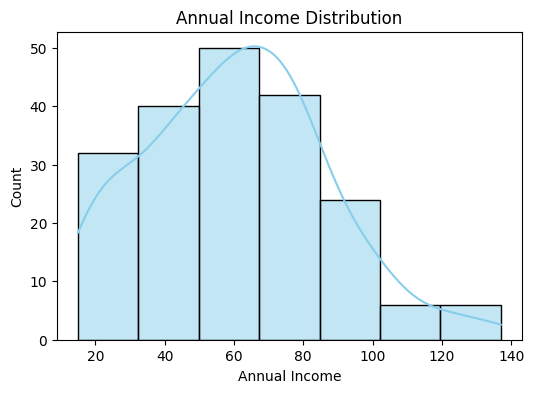

In [18]:
# Calculate the number of bins for the histogram
num_bins = int(np.ceil((df['Income'].max() - df['Income'].min()) / 20))


plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Income', bins=num_bins, kde=True, color='skyblue')

# Set the plot title and axis labels
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

# Show the plot
plt.show()

<ipython-input-55-cf09c5c25023>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Genre', y='Income', ci=None)


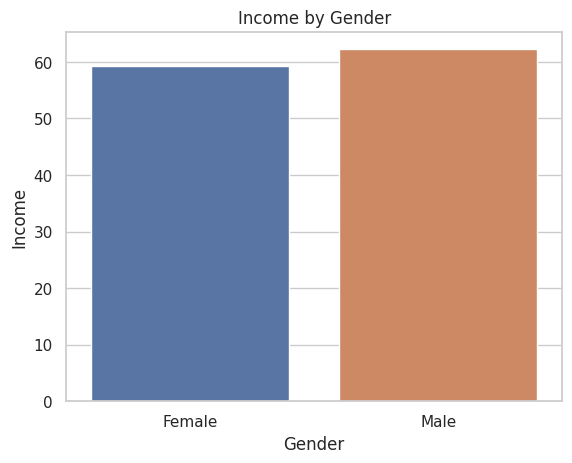

In [55]:
# Plot income by gender
sns.barplot(data=df, x='Genre', y='Income', ci=None)

# Set x-axis tick labels
plt.xticks([0, 1], ['Female', 'Male'])

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Income by Gender')

# Show the plot
plt.show()

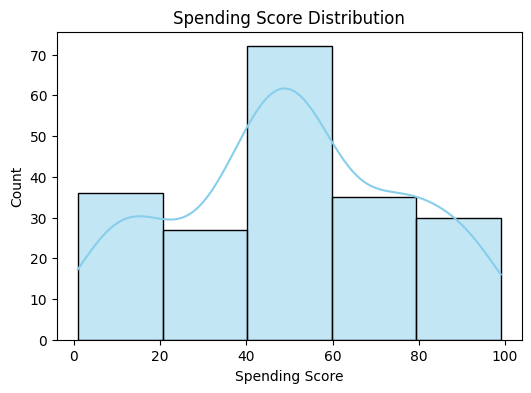

In [19]:
# Calculate the number of bins for the histogram
num_bins = int(np.ceil((df['SpSc'].max() - df['SpSc'].min()) / 20))


plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='SpSc', bins=num_bins, kde=True, color='skyblue')

# Set the plot title and axis labels
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')

# Show the plot
plt.show()

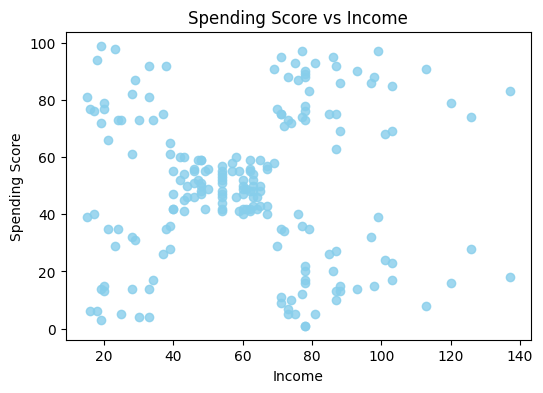

In [21]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Create the scatter plot
plt.scatter(df['Income'], df['SpSc'], c='skyblue', alpha=0.8)

# Set the plot title and axis labels
plt.title('Spending Score vs Income')
plt.xlabel('Income')
plt.ylabel('Spending Score')

# Show the plot
plt.show()

**K-Means Clustering**

---

Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

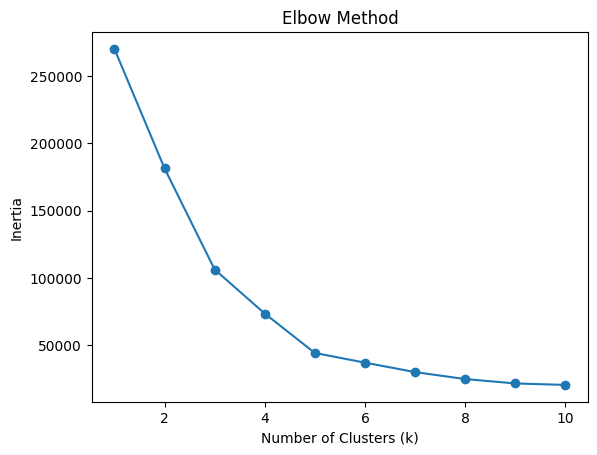

In [23]:
from sklearn.cluster import KMeans

# Select the features for clustering
X = df[['Income', 'SpSc']]

inertia = []

# Iterate over a range of cluster numbers
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Core Algorithm

In [28]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the data to the model
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters Visualization

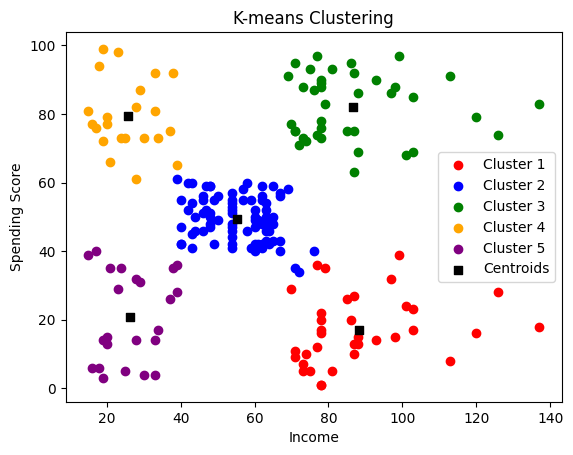

In [29]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the clusters
for i in range(k):
    plt.scatter(X.loc[labels == i, 'Income'], X.loc[labels == i, 'SpSc'], c=colors[i], label=f'Cluster {i+1}')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='s', color='black', label='Centroids')

plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


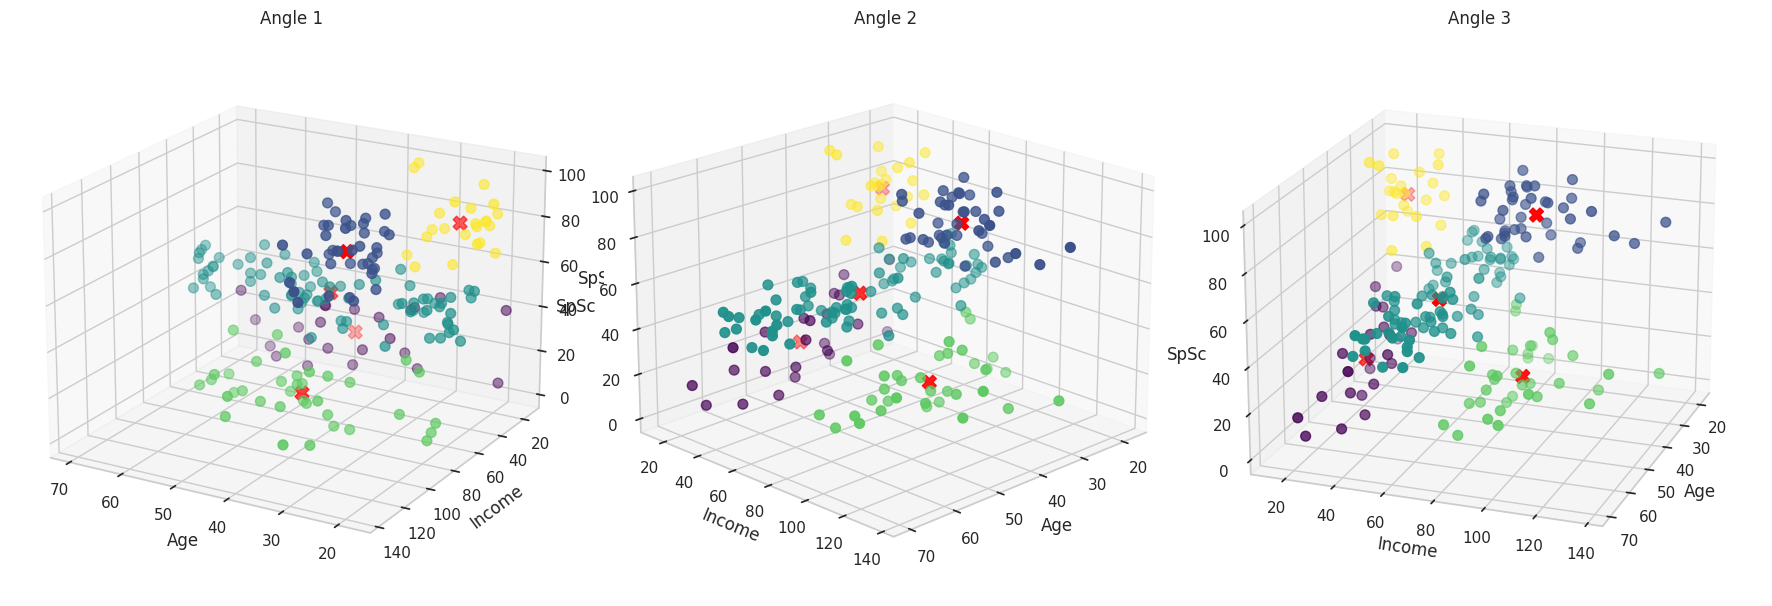

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Select the relevant features from your dataset
selected_features = ['Age', 'Income', 'SpSc']
X = df[selected_features].values

# Perform 3D k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Create subplots for each visualization
fig = plt.figure(figsize=(18, 6))

# Set different viewing angles for each subplot
angles = [(20, 120), (20, 45), (20, 20)]

# Plot data points and cluster centers for each subplot
for i, angle in enumerate(angles):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.view_init(angle[0], angle[1])

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)

    # Plot cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='X', s=100)

    # Set axis labels
    ax.set_xlabel('Age')
    ax.set_ylabel('Income')
    ax.set_zlabel('SpSc')

    # Set subplot title
    ax.set_title(f'Angle {i+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()